# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 50
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | Good domestic flight operated b...
1,Not Verified | Failed at all basic travel fund...
2,Not Verified | They lost my baggage in a very...
3,✅ Trip Verified | Late boarding led to a one ...
4,✅ Trip Verified | As usual the flight is delay...


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

## Exploratory data analysis

In [4]:
# Import library
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3621 entries, 0 to 3620
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  3621 non-null   object
dtypes: object(1)
memory usage: 28.4+ KB


In [6]:
df['length'] = df['reviews'].apply(len)
df.head()

,reviews,length
0,Not Verified | Good domestic flight operated b...,386
1,Not Verified | Failed at all basic travel fund...,279
2,Not Verified | They lost my baggage in a very...,599
3,✅ Trip Verified | Late boarding led to a one ...,383
4,✅ Trip Verified | As usual the flight is delay...,202


<AxesSubplot:xlabel='length', ylabel='Count'>

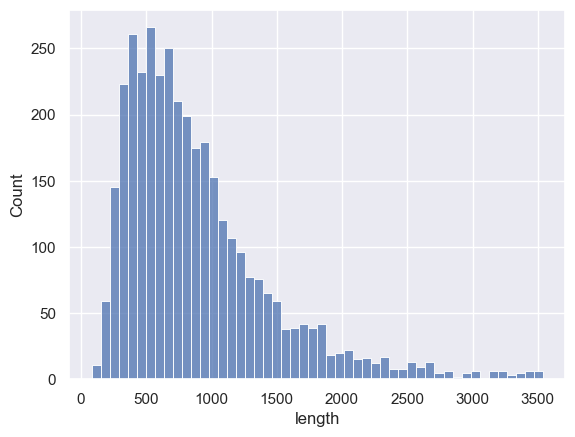

In [7]:
sns.histplot(df['length'], bins=50)

In [8]:
df['length'].describe()

count    3621.000000
mean      892.301022
std       572.472581
min        83.000000
25%       490.000000
50%       745.000000
75%      1120.000000
max      3537.000000
Name: length, dtype: float64

## Cleaning

#### Remove punctuation

In [109]:
import re

# Function to remove punctuation marks
def remove_punctuation(text):   
  return re.sub(r'[^\w\s]', '', text)

# Apply function to "review" column
df['reviews'] = df['reviews'].apply(remove_punctuation)

In [110]:
import string

def remove_punctuation_string(text):
    
    punctuation = string.punctuation
    translation_table = str.maketrans("", "", punctuation)
    return text.translate(translation_table)

# Apply function to "review" column
df['reviews'] = df['reviews'].apply(remove_punctuation_string)

#### Tokenize and remove verification

In [209]:
# Check-point
df_x_punctuation = df.copy()

In [210]:
from nltk.tokenize import word_tokenize

def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

# Apply function to "review" column
df_x_punctuation['reviews_token'] = df_x_punctuation['reviews'].apply(tokenize_text)

In [211]:
df_x_punctuation = df_x_punctuation.drop(columns= (['reviews', 'length']), axis=1)

In [212]:
df_x_punctuation['reviews_token'] = df_x_punctuation['reviews_token'].apply(lambda lista: [texto.lower() for texto in lista])

In [213]:
# Remover verification
for i in range(len(df)):
        for col, value in df_x_punctuation.iteritems():
            if value[i][0] + value[i][1] == 'notverified' or value[i][0] + value[i][1] == 'tripverified':
                del(value[i][0:2])  

####  Removal of the stop words

In [128]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dasan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [214]:
import nltk

def remove_stopwords(reviews):  

  stopwords = nltk.corpus.stopwords.words("english")

  new_reviews = []
  for review in reviews:
    new_review = []
    for word in review:
      if word not in stopwords:
        new_review.append(word)
    new_reviews.append(new_review)

  return new_reviews

df_x_punctuation['reviews_xStopwords'] = remove_stopwords(df_x_punctuation['reviews_token'])  

In [215]:
# Check-point
df_clenead = df_x_punctuation.copy()

In [216]:
df_clenead = df_clenead.drop(columns= ('reviews_token'), axis=1)

#### Lemmatize

In [217]:
df_clenead

,reviews_xStopwords
0,"[good, domestic, flight, operated, ba, cityfly..."
1,"[failed, basic, travel, fundamentals, 1, fligh..."
2,"[lost, baggage, simple, situation, three, week..."
3,"[late, boarding, led, one, hour, flight, leavi..."
4,"[usual, flight, delayed, ba, try, blame, someo..."
...,...
3616,"[yyz, lhr, july, 2012, flew, overnight, premiu..."
3617,"[lhr, ham, purser, addresses, club, passengers..."
3618,"[son, worked, british, airways, urged, fly, br..."
3619,"[london, citynew, york, jfk, via, shannon, a31..."


In [218]:
from nltk.stem import WordNetLemmatizer

def lemmatize_reviews(reviews):
  
  lemmatizer = WordNetLemmatizer()

  new_reviews = []
  for review in reviews:
    new_review = []
    for word in review:
      new_word = lemmatizer.lemmatize(word)
      new_review.append(new_word)
    new_reviews.append(new_review)

  return new_reviews

df_clenead['reviews_lemmatized'] = lemmatize_reviews(df_clenead['reviews_xStopwords']) 

## Sentimental Anaysis

In [219]:
# Check-point
df_preprocessed = df_clenead.drop('reviews_xStopwords', axis = 1)

In [223]:
from textblob import TextBlob

# Analyze the feeling of each review
def get_sentiment(tokens):
    text = ' '.join(tokens)
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    
    if polarity > 0:
        sentiment = "positive"
    elif polarity < 0:
        sentiment = "negative"
    else:
        sentiment = "neutral"
    
    return sentiment

# Apply sentiment analysis to DataFrame
df_preprocessed['sentiment'] = df_preprocessed['reviews_lemmatized'].apply(get_sentiment)

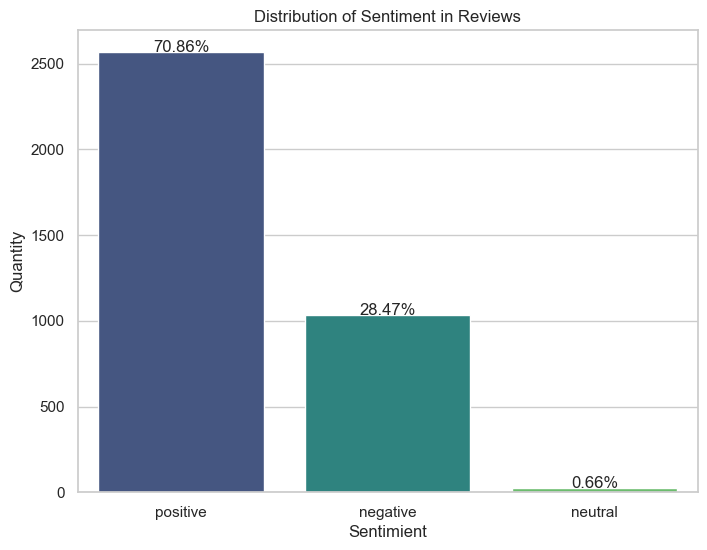

In [226]:
# Crear un conteo de sentimientos
sentimiento_count = df_preprocessed['sentiment'].value_counts()

# Calcular los porcentajes
total = sentimiento_count.sum()
porcentajes = (sentimiento_count / total) * 100

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=sentimiento_count.index, y=sentimiento_count.values, palette="viridis")
plt.title('Distribution of Sentiment in Reviews')
plt.xlabel('Sentimient')
plt.ylabel('Quantity')

# Agregar porcentajes en las barras
for i, porcentaje in enumerate(porcentajes):
    plt.text(i, sentimiento_count.values[i] + 1, f'{porcentaje:.2f}%', ha='center', fontsize=12)

plt.show()

In [231]:
df_preprocessed

,reviews_lemmatized,sentiment
0,"[good, domestic, flight, operated, ba, cityfly...",positive
1,"[failed, basic, travel, fundamental, 1, flight...",negative
2,"[lost, baggage, simple, situation, three, week...",positive
3,"[late, boarding, led, one, hour, flight, leavi...",negative
4,"[usual, flight, delayed, ba, try, blame, someo...",negative
...,...,...
3616,"[yyz, lhr, july, 2012, flew, overnight, premiu...",positive
3617,"[lhr, ham, purser, address, club, passenger, n...",positive
3618,"[son, worked, british, airway, urged, fly, bri...",positive
3619,"[london, citynew, york, jfk, via, shannon, a31...",positive


## Topic Modeling

In [238]:
from gensim import corpora, models
from pprint import pprint

# Create a dictionary and a corpus
dictionary = corpora.Dictionary(df_preprocessed["reviews_lemmatized"])
corpus = [dictionary.doc2bow(reseña) for reseña in df_preprocessed["reviews_lemmatized"]]

# Apply the LDA model
lda_model = models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15)

# Print the identified themes
for idx, topic in lda_model.print_topics():
    print(f"Topic: {idx} \nWords: {topic}\n")

# AAssign a theme to each review
df_preprocessed['topic'] = [max(lda_model[corpus[i]], key=lambda x: x[1])[0] for i in range(len(corpus))]

Topic: 0 
Words: 0.028*"flight" + 0.018*"ba" + 0.010*"airway" + 0.010*"british" + 0.009*"hour" + 0.008*"customer" + 0.008*"told" + 0.008*"london" + 0.008*"would" + 0.008*"service"

Topic: 1 
Words: 0.020*"seat" + 0.020*"flight" + 0.014*"ba" + 0.011*"food" + 0.010*"service" + 0.009*"cabin" + 0.009*"crew" + 0.009*"class" + 0.009*"good" + 0.007*"economy"

Topic: 2 
Words: 0.028*"flight" + 0.012*"time" + 0.011*"ba" + 0.011*"boarding" + 0.011*"lounge" + 0.009*"crew" + 0.009*"good" + 0.007*"minute" + 0.007*"check" + 0.007*"passenger"

                                                reviews  length  Tema
0     Not Verified  Good domestic flight operated by...     386     2
1     Not Verified  Failed at all basic travel funda...     279     2
2     Not Verified   They lost my baggage in a very ...     599     1
3      Trip Verified   Late boarding led to a one ho...     383     2
4      Trip Verified  As usual the flight is delayed...     202     2
...                                          

In [239]:
df_preprocessed

,reviews_lemmatized,sentiment,topic
0,"[good, domestic, flight, operated, ba, cityfly...",positive,2
1,"[failed, basic, travel, fundamental, 1, flight...",negative,0
2,"[lost, baggage, simple, situation, three, week...",positive,0
3,"[late, boarding, led, one, hour, flight, leavi...",negative,2
4,"[usual, flight, delayed, ba, try, blame, someo...",negative,0
...,...,...,...
3616,"[yyz, lhr, july, 2012, flew, overnight, premiu...",positive,1
3617,"[lhr, ham, purser, address, club, passenger, n...",positive,2
3618,"[son, worked, british, airway, urged, fly, bri...",positive,0
3619,"[london, citynew, york, jfk, via, shannon, a31...",positive,1


## Create a visual representetaion WordCloud

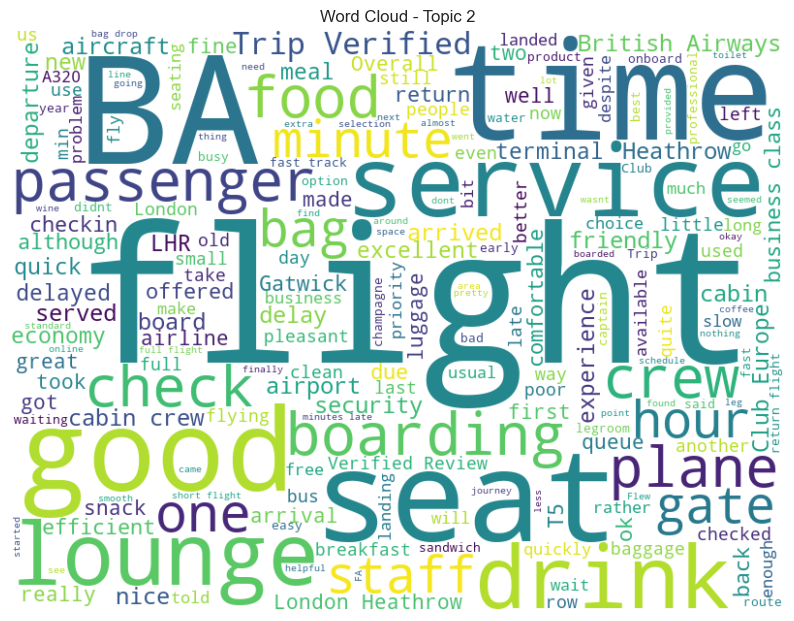

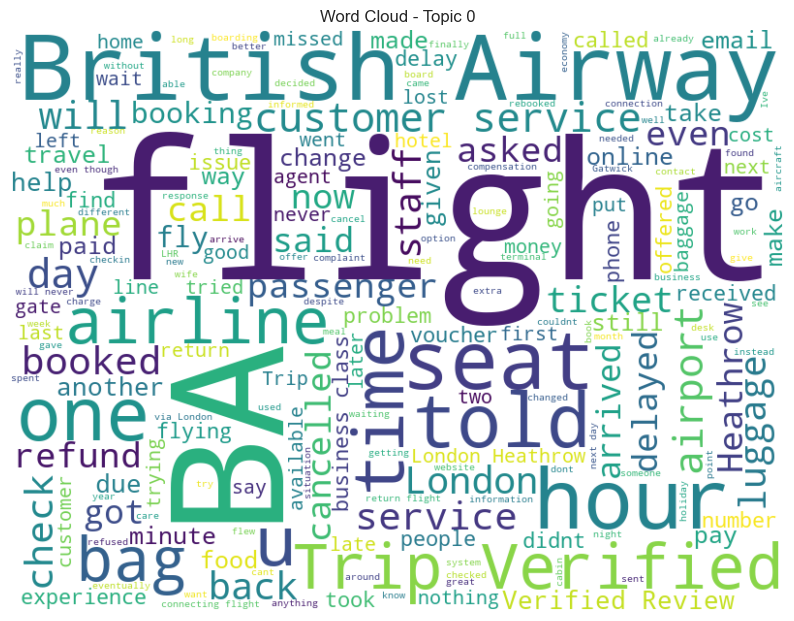

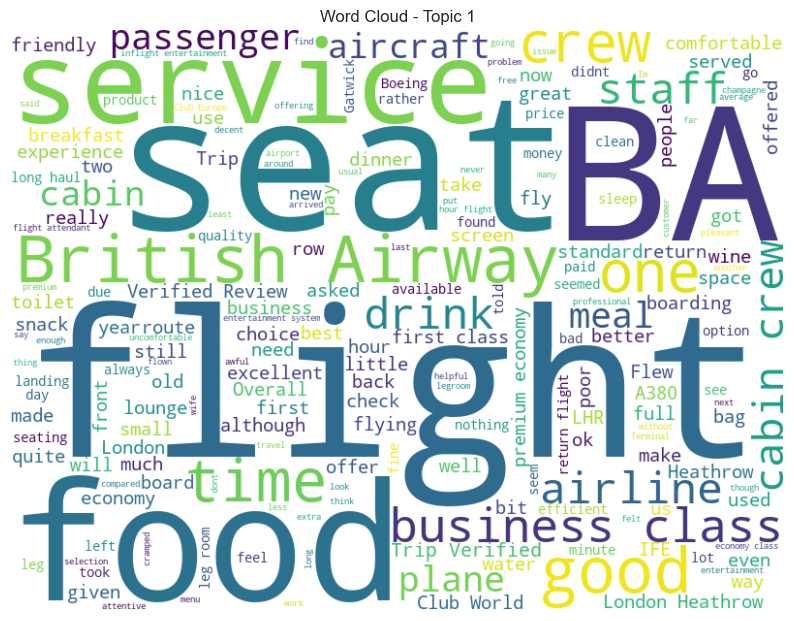

In [248]:
# Import library
from wordcloud import WordCloud

for topic in df_preprocessed['topic'].unique():
    words = ' '.join(df[df_preprocessed['topic'] == topic]['reviews'])
    wordcloud = WordCloud(width=800, height=600, background_color='white').generate(words)
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud - Topic {topic}')
    plt.axis('off')
    plt.show()